# Question 1 Graphs

|<div style="opacity: 0;">Is this the real life? Or is this just fantasy? Caught in a landslide, no escape from reality</div>|<div style="opacity: 0;">Open your eyes, look up to the skies and see. I'm just a poor boy, I need no sympathy.</div>|
|:---------------:|:-------------------:|
|![BFS_DFS](.\images\BFS_DFS.svg)|![BFS_DFS_2](.\images\BFS_DFS_2.svg)|
|     **(a)**     |        **(b)**      |


|<div style="opacity: 0;">Never gonna give you up. Never gonna let you down. Never gonna run around and desert you.</div>|<div style="opacity: 0;">Never gonna make you cry. Never gonna say goodbye. Never gonna tell a lie and hurt you</div>|
|:-------------------:|:-------------------:|
|![BFS_DFS_4](.\images\BFS_DFS_4.svg)|![BFS_DFS_3](.\images\BFS_DFS_3.svg)|
|       **(c)**       |       **(d)**       |

# Question 3 Graphs

|<div style="opacity: 0;">Yo, Big Shaq, the one and only</div>|<div style="opacity: 0;">Man's not hot, never hot</div>|<div style="opacity: 0;">Skrrat, skidi-kat-kat. Boom!</div>|
|:---------------:|:-------------------:|:-------------------:|
|![dag](.\images\dag.svg)|![dag_2](.\images\dag_2.svg)|![dag_3](.\images\dag_3.svg)|
|     **(a)**     |        **(b)**      |       **(c)**       |

In [21]:
graph3a = {
    "A":["B","C"],
    "B":["D","E"],
    "C":["F"],
    "D":["G"],
    "E":["G"],
    "F":["E","G"],
    "G":[]   
}

graph3b = {
    "A":['B'],
    'B':['C','D','E'],
    'C':['E'],
    'D':['E'],
    'E':['F'],
    'F':[],
    'G':['D']
}

graph3c = {
    "A":["D","E"],
    "B":["D"],
    "C":["E","H"],
    "D":["F","G"],
    "E":["G"],
    "F":[],
    "G":[],
    "H":[]
}

graph3aCyc = {
    "A":["B","C"],
    "B":["D","E"],
    "C":["F"],
    "D":["G"],
    "E":["G", "F"],
    "F":["E","G"],
    "G":["E", "F"]   
}

graphA = {
    "D": ["C"],
    "B": ["D"],
    "S": ["D","C","A"],
    "C": ["B", "E"],
    "E": ["S"],
    "A": []
}

graphB = {
    "A": ["E","S","D"],
    "B": ["E","G"],
    "C": ["S","E"],
    "D": ["A","F"],
    "E": ["A","C","B"],
    "F": ['S',"D"],
    "G": ['B'],
    "S": ['C','F','A']
}

graphC = { # with weights
    "A":[("B",3),("S",2)],
    "B":[()],
    "C":[("D",5)],
    "D":[("E",1)],
    "E":[("C",2)],
    "F":[("C",9),("G",6)],
    "G":[("H",7)],
    "H":[("E",8)],
    "S":[("G",5),("C",10)]    
}

In [22]:
def detectCycle(graph):
    """
    Detect if a cycle exists in a graph. Graph is represented by a dictionary where each key represents a vertex and
    each value is an adjacency list to a list of vertices.
    """
    import copy
    
    graph = copy.deepcopy(graph)
    
    flag = {key:-1 for key in graph}
    
    visited_vertices = []
    frontier = []
    
    root = list(graph.keys())[0]
    
    frontier.append(root)
    flag[root] += 1

    while len(frontier)>0:
        
        node = frontier.pop()
        visited_vertices.append(node)
        flag[node] += 1
        
        for neiNode in graph[node]:
            if flag[neiNode] == 0:
                # print("Cycle detected. True is returned.")
                return True
            if neiNode not in visited_vertices and neiNode not in frontier:
                frontier.append(neiNode)
                flag[neiNode] += 1
            else:
                continue
    
    return False

In [36]:
print("graph3c: ", detectCycle(graph3c)) # No cycle
print()
print("graph3aCyc: ", detectCycle(graph3aCyc)) # Undirected Cycle
print()
print("graphA: ",detectCycle(graphA)) # Directed Cycle
print()
print("graphB: ",detectCycle(graphB)) # Undirected Cycle
print()
print("graphC: ",detectCycle(graphC)) # Weighted Cycle

graph3c:  False

graph3aCyc:  True

graphA:  False

graphB:  True



KeyError: ('B', 3)

# Kruskal Algorithm

In [14]:
graph5_edges = {
    ("A","B",6),
    ("A","S",7),
    ("A","C",3),
    ("S","C",8),
    ("C","B",4),
    ("C","D",3),
    ("B","D",2),
    ("B","T",5),
    ("D","T",2)
}

graph5a = {
    "A":[("B",6),("S",7),("C", 3)],
    "B":[("A", 6), ("D", 2), ("T", 5),("C", 4)],
    "C":[("A", 3),("B", 4),("S", 8),("D",3)],
    "D":[("C",3),("B",2),("T",2)],
    "S":[("A", 7), ("C", 8)],
    "T":[("B", 5), ("D",2)],
}

## Kruskal using Cycle Detection

In [8]:
def convertAdjaListToEdges(graph):
    """
    Helper function to convert adjacent list representation to edges. The adjacent list is a list of tuples in the form
    (endNode, otherEndNode, weight).
    """
    import copy
    
    graph = copy.deepcopy(graph)
    
    visited_vertices = []
    
    edges = set()
    
    for k,v in graph.items():
        visited_vertices.append(k)
        for vs in v:
            if vs[0] not in visited_vertices:
                edges.add((k, vs[0], vs[1]))
            else:
                continue
                
    return edges

In [9]:
def convertListOfEdges_toAdjaList(list_edges, weight = None):
    
    vertices = set()
    
    for u, v, w in list_edges:
        vertices.add(u)
        vertices.add(v)
        
    d = {vertex:list() for vertex in vertices}
    
    if weight != None:
        for u, v, w in list_edges:
            d[u].append((v, w))
            d[v].append((u, w))
    
    else:
        for u, v, w in list_edges:
            d[u].append(v)
            d[v].append(u)
            
    return d

In [10]:
def krus_Cycle(graph):
    import copy
    
    graph = copy.deepcopy(graph)    
    graph_edges = convertAdjaListToEdges(graph)
    graph_edges = sorted(graph_edges, key = lambda x:x[2], reverse = True)
#     print(graph_edges)
    edge = graph_edges.pop()
#     print("first edge", edge)
    MST = [edge]
    
    while graph_edges:
        
        edge = graph_edges.pop()
#         print(edge)
        MST.append(edge)
        
        if detectCycle(convertListOfEdges_toAdjaList(MST)):
            MST.pop()
            continue
            
    weight = sum([e[2] for e in MST])
            
    return MST, weight
    

|<div style="opacity: 0;">His palms are sweaty, knees weak, arms are heavy</div>|<div style="opacity: 0;">There's vomit on his sweater already, mom's spaghetti</div>|
|:-------------------:|:-------------------:|
|![prim_2](.\images\prim_2.svg)|![prim](.\images\prim.svg)|
|**Graph 5(a)** |**Graph 5(b)**  |

# Try using Self-developed Kruskal on MRT Graph

In [68]:
MRT = {}
MRT['Bartley']             = {'Serangoon (CL)': 2}
MRT['Bishan (NSL)']        = {'Bishan (CL)':3, 'Choa Chu Kang':31, 'Dhoby Ghaut (NSL)':13}
MRT['Bishan (CL)']         = {'Marymount': 2, 'Bishan (NSL)': 3, 'Serangoon (CL)': 4}
MRT['Changi Airport']      = {'Tanah Merah (CA)':8}
MRT['Chinatown']           = {'Outram Park (NEL)':2, 'Dhoby Ghaut (NEL)':4}
MRT['Choa Chu Kang']       = {'Jurong East (NSL)':8, 'Bishan (NSL)':31}
MRT['City Hall (EWL)']     = {'City Hall (NSL)':3, 'Raffles Place (EWL)':2, 'Tanah Merah (JK)':18}
MRT['City Hall (NSL)']     = {'City Hall (EWL)':3, 'Dhoby Ghaut (NSL)':2, 'Raffles Place (NSL)':2}
MRT['Dhoby Ghaut (NEL)']   = {'Dhoby Ghaut (NSL)':3, 'Little India':2, 'Chinatown':4}
MRT['Dhoby Ghaut (NSL)']   = {'Dhoby Ghaut (NEL)':3, 'City Hall (NSL)':2, 'Bishan (NSL)':13}
MRT['Harbour Front']       = {'Outram Park (NEL)':3}
MRT['Joo Koon']            = {'Jurong East (EWL)':10}
MRT['Jurong East (EWL)']   = {'Jurong East (NSL)':3, 'Outram Park (EWL)':18, 'Joo Koon':10} # Correct
MRT['Jurong East (NSL)']   = {'Jurong East (EWL)':3, 'Choa Chu Kang':8}
MRT['Little India']        = {'Dhoby Ghaut (NEL)':2, 'Serangoon (NEL)':10}
MRT['Marina Bay']          = {'Raffles Place (NSL)':2}
MRT['Marymount']           = {'Bishan (CL)':2}
MRT['Outram Park (EWL)']   = {'Outram Park (NEL)':3, 'Raffles Place (EWL)':4, 'Jurong East (EWL)':18}
MRT['Outram Park (NEL)']   = {'Outram Park (EWL)':3, 'Harbour Front':3, 'Chinatown':2}
MRT['Pasir Ris']           = {'Tanah Merah (PR)':8}
MRT['Punggol']             = {'Sengkang':3}
MRT['Raffles Place (EWL)'] = {'Raffles Place (NSL)':3, 'City Hall (EWL)':2, 'Outram Park (EWL)':4}
MRT['Raffles Place (NSL)'] = {'Raffles Place (EWL)':3, 'Marina Bay':2, 'City Hall (NSL)':2}
MRT['Sengkang']            = {'Punggol':3, 'Serangoon (NEL)':8}
MRT['Serangoon (CL)']      = {'Serangoon (NEL)':3, 'Bartley':2, 'Bishan (CL)':4}
MRT['Serangoon (NEL)']     = {'Serangoon (CL)':3, 'Sengkang':8, 'Little India':10}
MRT['Tanah Merah (JK)']    = {'Tanah Merah (PR)':3, 'Tanah Merah (CA)':3, 'City Hall (EWL)': 18} # JK - Joo Koon
MRT['Tanah Merah (PR)']    = {'Tanah Merah (JK)':3, 'Pasir Ris':8, 'Tanah Merah (CA)':3} # PR - Pasir Ris
MRT['Tanah Merah (CA)']    = {'Tanah Merah (JK)':3, 'Changi Airport':8, 'Tanah Merah (PR)':3} # CA - Changi Airport

In [69]:
newMRT = {key:[] for key in MRT}

for vertex, dictVertexs in MRT.items():
    for destin, weight in dictVertexs.items():
        newMRT[vertex].append((destin, weight))
newMRT

{'Bartley': [('Serangoon (CL)', 2)],
 'Bishan (NSL)': [('Bishan (CL)', 3),
  ('Choa Chu Kang', 31),
  ('Dhoby Ghaut (NSL)', 13)],
 'Bishan (CL)': [('Marymount', 2), ('Bishan (NSL)', 3), ('Serangoon (CL)', 4)],
 'Changi Airport': [('Tanah Merah (CA)', 8)],
 'Chinatown': [('Outram Park (NEL)', 2), ('Dhoby Ghaut (NEL)', 4)],
 'Choa Chu Kang': [('Jurong East (NSL)', 8), ('Bishan (NSL)', 31)],
 'City Hall (EWL)': [('City Hall (NSL)', 3),
  ('Raffles Place (EWL)', 2),
  ('Tanah Merah (JK)', 18)],
 'City Hall (NSL)': [('City Hall (EWL)', 3),
  ('Dhoby Ghaut (NSL)', 2),
  ('Raffles Place (NSL)', 2)],
 'Dhoby Ghaut (NEL)': [('Dhoby Ghaut (NSL)', 3),
  ('Little India', 2),
  ('Chinatown', 4)],
 'Dhoby Ghaut (NSL)': [('Dhoby Ghaut (NEL)', 3),
  ('City Hall (NSL)', 2),
  ('Bishan (NSL)', 13)],
 'Harbour Front': [('Outram Park (NEL)', 3)],
 'Joo Koon': [('Jurong East (EWL)', 10)],
 'Jurong East (EWL)': [('Jurong East (NSL)', 3),
  ('Outram Park (EWL)', 18),
  ('Joo Koon', 10)],
 'Jurong East (NSL)'

In [23]:
krus_Cycle(newMRT)

([('Bartley', 'Serangoon (CL)', 2),
  ('City Hall (EWL)', 'Raffles Place (EWL)', 2),
  ('Chinatown', 'Outram Park (NEL)', 2),
  ('Bishan (CL)', 'Marymount', 2),
  ('City Hall (NSL)', 'Dhoby Ghaut (NSL)', 2),
  ('City Hall (NSL)', 'Raffles Place (NSL)', 2),
  ('Dhoby Ghaut (NEL)', 'Little India', 2),
  ('Marina Bay', 'Raffles Place (NSL)', 2),
  ('Tanah Merah (JK)', 'Tanah Merah (CA)', 3),
  ('Jurong East (EWL)', 'Jurong East (NSL)', 3),
  ('Raffles Place (EWL)', 'Raffles Place (NSL)', 3),
  ('Outram Park (EWL)', 'Outram Park (NEL)', 3),
  ('Tanah Merah (JK)', 'Tanah Merah (PR)', 3),
  ('Harbour Front', 'Outram Park (NEL)', 3),
  ('Tanah Merah (PR)', 'Tanah Merah (CA)', 3),
  ('Serangoon (CL)', 'Serangoon (NEL)', 3),
  ('Punggol', 'Sengkang', 3),
  ('Bishan (NSL)', 'Bishan (CL)', 3),
  ('City Hall (EWL)', 'City Hall (NSL)', 3),
  ('Dhoby Ghaut (NEL)', 'Dhoby Ghaut (NSL)', 3),
  ('Bishan (CL)', 'Serangoon (CL)', 4),
  ('Chinatown', 'Dhoby Ghaut (NEL)', 4),
  ('Outram Park (EWL)', 'Raffle

# Dijkstra Algorithm

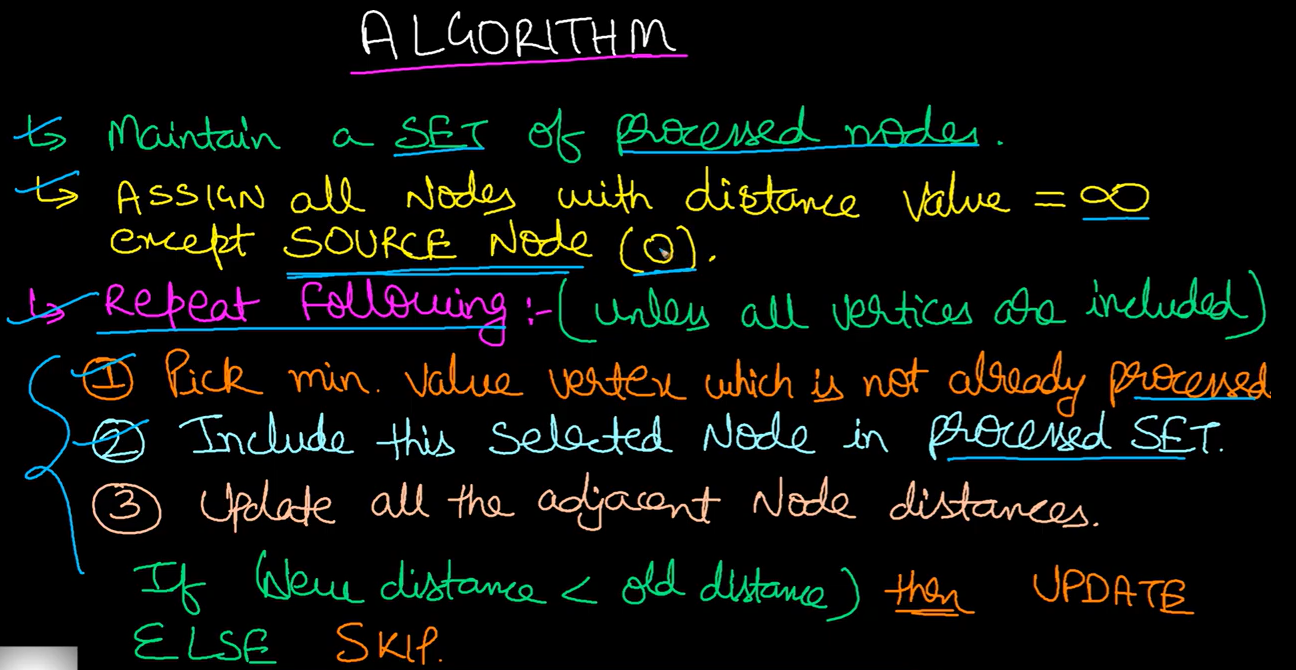

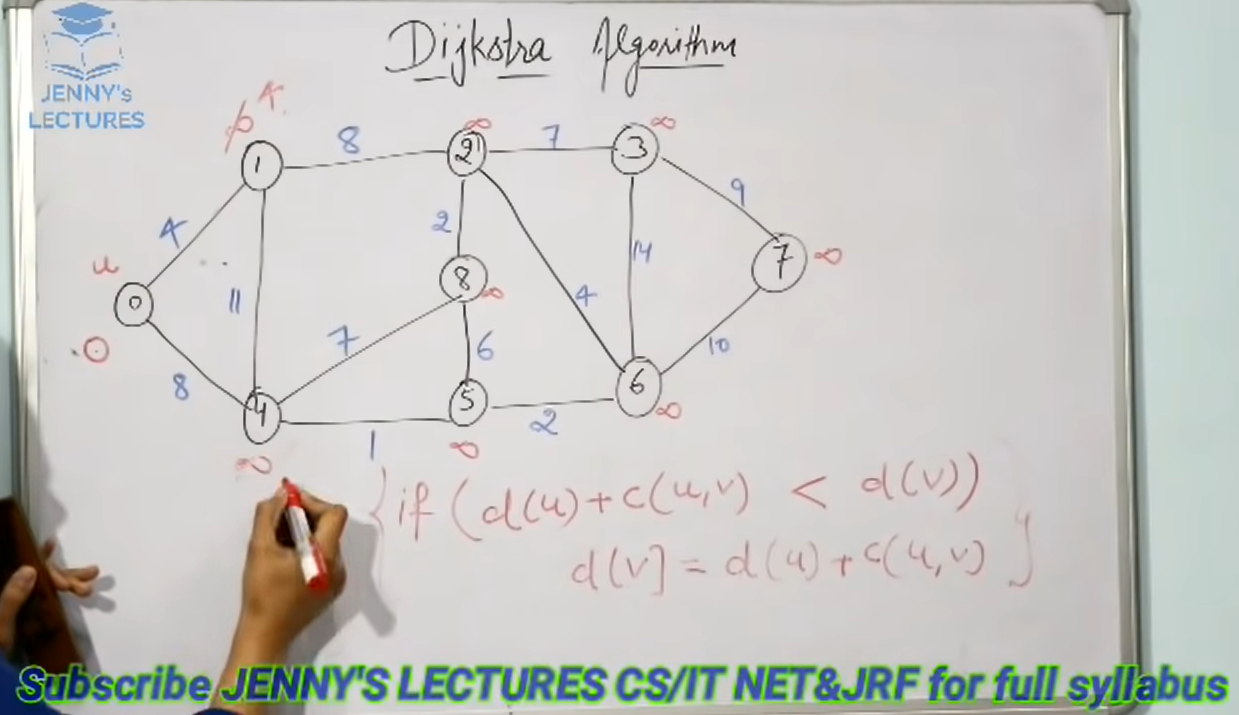

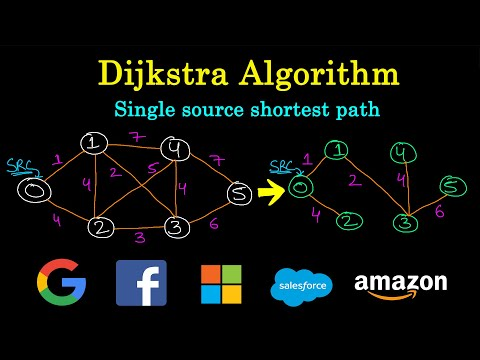

In [9]:
from IPython.display import YouTubeVideo

YouTubeVideo('Sj5Z-jaE2x0', height = 800, width = 800)


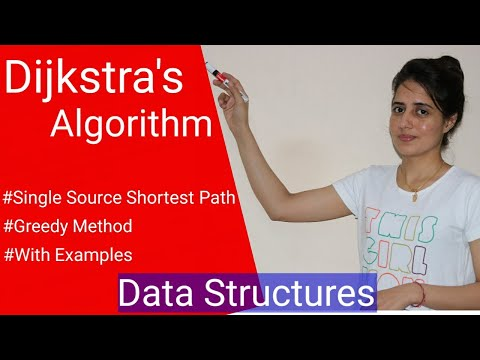

In [10]:
YouTubeVideo('smHnz2RHJBY', height = 800, width = 800)

In [65]:
def dijkstraAlgo(graph, source):
    
    allVertices = {key for key in graph}
    visited_vertices = set()
    distances = {key:float('inf') for key in graph}
    distances[source] = 0
    
    parents = {key:None for key in graph}
    parents[source] = source
    
    currentVertex = min(distances, key=distances.get)
    
    while len(visited_vertices) < len(graph):
        
        if currentVertex not in visited_vertices:
            visited_vertices.add(currentVertex)
            for neighborVertex in graph[currentVertex]: # neighborVertex is a tuple (neighborVertex, weight)
#                 print("*",neighborVertex)
                if neighborVertex[0] not in visited_vertices: # neighborVertex[0] is neighbor vertex
#                     print("**", neighborVertex[0])
                    if (distances[currentVertex] + neighborVertex[1]) < distances[neighborVertex[0]]:
                        parents[neighborVertex[0]] = currentVertex
                        distances[neighborVertex[0]] = distances[currentVertex] + neighborVertex[1]
            notVisited = allVertices - visited_vertices
            if notVisited == set():
                break
            else:
                notVisitedDistances = {key:distances[key] for key in notVisited}
#                 print("***", notVisitedDistances)
                currentVertex = min(notVisitedDistances, key=notVisitedDistances.get)
            
    return distances, parents

In [66]:
dijkstraAlgo(graph5a, 'A')

({'A': 0, 'B': 6, 'C': 3, 'D': 6, 'S': 7, 'T': 8},
 {'A': 'A', 'B': 'A', 'C': 'A', 'D': 'C', 'S': 'A', 'T': 'D'})

In [72]:
dijkstraAlgo(newMRT, 'Marymount')

({'Bartley': 8,
  'Bishan (NSL)': 5,
  'Bishan (CL)': 2,
  'Changi Airport': 52,
  'Chinatown': 25,
  'Choa Chu Kang': 36,
  'City Hall (EWL)': 23,
  'City Hall (NSL)': 20,
  'Dhoby Ghaut (NEL)': 21,
  'Dhoby Ghaut (NSL)': 18,
  'Harbour Front': 30,
  'Joo Koon': 57,
  'Jurong East (EWL)': 47,
  'Jurong East (NSL)': 44,
  'Little India': 19,
  'Marina Bay': 24,
  'Marymount': 0,
  'Outram Park (EWL)': 29,
  'Outram Park (NEL)': 27,
  'Pasir Ris': 52,
  'Punggol': 20,
  'Raffles Place (EWL)': 25,
  'Raffles Place (NSL)': 22,
  'Sengkang': 17,
  'Serangoon (CL)': 6,
  'Serangoon (NEL)': 9,
  'Tanah Merah (JK)': 41,
  'Tanah Merah (PR)': 44,
  'Tanah Merah (CA)': 44},
 {'Bartley': 'Serangoon (CL)',
  'Bishan (NSL)': 'Bishan (CL)',
  'Bishan (CL)': 'Marymount',
  'Changi Airport': 'Tanah Merah (CA)',
  'Chinatown': 'Dhoby Ghaut (NEL)',
  'Choa Chu Kang': 'Bishan (NSL)',
  'City Hall (EWL)': 'City Hall (NSL)',
  'City Hall (NSL)': 'Dhoby Ghaut (NSL)',
  'Dhoby Ghaut (NEL)': 'Dhoby Ghaut (NS

In [81]:
def shortestPath(graph, source, end):
    
    D, P = dijkstraAlgo(graph, source)
    
    duration = D[end]
    
    path = [end]
    vertex = end
    
    while vertex != source:
        path.append(P[vertex])
        vertex = P[vertex]
    path.reverse()
    return duration, path

In [82]:
shortestPath(newMRT, 'Choa Chu Kang', 'Little India')

(40,
 ['Choa Chu Kang',
  'Jurong East (NSL)',
  'Jurong East (EWL)',
  'Outram Park (EWL)',
  'Outram Park (NEL)',
  'Chinatown',
  'Dhoby Ghaut (NEL)',
  'Little India'])

|<div style="opacity: 0;">His palms are sweaty, knees weak, arms are heavy</div>|<div style="opacity: 0;">There's vomit on his sweater already, mom's spaghetti</div>|
|:-------------------:|:-------------------:|
|![prim_2](.\images\prim_2.svg)|![prim](.\images\prim.svg)|
|**Graph 5(a)** |**Graph 5(b)**  |

In [1]:
graph5_edges = {
    ("A","B",6),
    ("A","S",7),
    ("A","C",3),
    ("S","C",8),
    ("C","B",4),
    ("C","D",3),
    ("B","D",2),
    ("B","T",5),
    ("D","T",2)
}

graph5a = {
    "A":[("B",6),("S",7),("C", 3)],
    "B":[("A", 6), ("D", 2), ("T", 5),("C", 4)],
    "C":[("A", 3),("B", 4),("S", 8),("D",3)],
    "D":[("C",3),("B",2),("T",2)],
    "S":[("A", 7), ("C", 8)],
    "T":[("B", 5), ("D",2)],
}

In [2]:
# Djikstra from the Internet: https://bradfieldcs.com/algos/graphs/dijkstras-algorithm/

import heapq


def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances


example_graph = {
    'U': {'V': 2, 'W': 5, 'X': 1},
    'V': {'U': 2, 'X': 2, 'W': 3},
    'W': {'V': 3, 'U': 5, 'X': 3, 'Y': 1, 'Z': 5},
    'X': {'U': 1, 'V': 2, 'W': 3, 'Y': 1},
    'Y': {'X': 1, 'W': 1, 'Z': 1},
    'Z': {'W': 5, 'Y': 1},
}
print(calculate_distances(example_graph, 'X'))
# => {'U': 1, 'W': 2, 'V': 2, 'Y': 1, 'X': 0, 'Z': 2}

{'U': 1, 'V': 2, 'W': 2, 'X': 0, 'Y': 1, 'Z': 2}


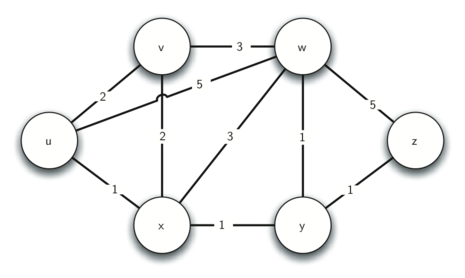